# Alien Abductions - Run for it!

![aliens](https://media.giphy.com/media/QQ8ZqOVm0fabC/giphy.gif)

Wooded areas are good for avoiding alien tractor beams. Once you've escaped the open fields on your bike, find the woods to evade the flying saucer. It's not a guaranteed escape, but it'll give you a fighting chance. 

### The Goal:
Find the neighborhood in Pittsburgh with the highest percentage of dense, wooded land to increase your survival chances in an alien abduction.

# The Code:

In [21]:
#Required imports:
import pandas as pd
import geopandas
from shapely.geometry import Polygon, LineString, Point
%matplotlib inline

### Datasets:
* "Neighborhoods": use to identify the 90 unique Pittsburgh neighborhoods. Neighborhood shape-file accessible from WPRDC [here](https://data.wprdc.org/dataset/neighborhoods2).
* "Allegheny County Wooded Area Boundaries": use to identify wooded areas (stands of trees too numerous to plot as individual trees). Shape file for wooded areas accessible [here](https://data.wprdc.org/dataset/allegheny-county-wooded-area-boundaries1).

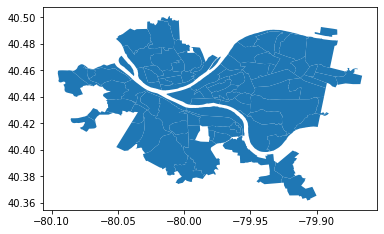

In [22]:
#Create and plot neighborhoods:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

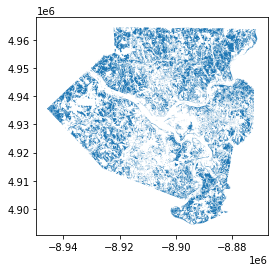

In [23]:
#Create and plot wooded areas:
woods_shape = geopandas.read_file("Wooded_Areas.shp") # read in the shapefile
woods_shape.plot() # plot the geopandas dataframe

Next, for each neighborhood use interesctions to find the amount of area in the neighborhood that is forested. 

**Warning:** This code section takes ~25 minutes to run because it checks for an intersection for each polygon in the forested area, which is time intensive. You don't need to run this code - instead, skip two sections down and load the already-stored values

In [ ]:
#convert crs so both GeoDataFrames are using the same coordinate reference systems
neighborhoods = neighborhoods.to_crs(3857)
woods_shape = woods_shape.to_crs(3857)
#create empty dicts to fill in the loop
woods_dict = {}
area_dict = {}
#for each neighborhood, get the total area of the neighborhood and the total wooded area in the neighborhood
for index, row in neighborhoods.iterrows():
    poly = geopandas.GeoSeries(row['geometry'])
    poly_area = poly.area
    area_dict[index] = poly_area #save total area
    total_area = 0
    #check if each polygon (wooded area) in the woods GeoDataFrame has an intersection with the neighborhood
    for i, r in woods_shape.iterrows():
        polyw = geopandas.GeoSeries(r['geometry'])
        inter = poly.intersection(polyw)
        #add the area of that intersection to the total wooded area
        total_area = total_area + inter.area
    woods_dict[index] = total_area #save wooded area

**Do not run** - this is the original block to store the dictionaries generated by the above code

In [16]:
%store area_dict
%store woods_dict

Stored 'area_dict' (dict)
Stored 'woods_dict' (dict)


**Run** - Okay, you can run all the rest now!

In [24]:
#restore the area_dict and woods_dict from memory
%store -r area_dict
%store -r woods_dict

In [25]:
#Convert the total areas and areas of woodlands to percentage woods
areas = list(area_dict.values())
woods = list(woods_dict.values())
i = 0
percentages = []
while i <= 89:
    percentages.append(woods[i]/areas[i])#calculate percentage woodland and append to list
    i = i+1

In [26]:
#build final dataframe
n = pd.read_csv("Neighborhoods.csv")
n = n[["objectid", "hood"]] #use csv file to get neighborhood names
n.rename(columns={'objectid': 'ID', 'hood': 'Neighborhood'}, inplace=True)
#convert percentages to ints because sorting floats can be complicated
per = []
for p in percentages:
    p = int(p*100)
    per.append(p)
#add percents to datafram
n["Percentage Wooded"] = per
#sort and output dataframe
n.sort_values(by=["Percentage Wooded"], ascending=False)


,ID,Neighborhood,Percentage Wooded
18,1311,Hays,71
59,1352,Glen Hazel,64
20,1313,New Homestead,61
68,1361,St. Clair,49
71,1364,Arlington Heights,41
...,...,...,...
61,1354,South Side Flats,0
29,1322,Friendship,0
31,1324,Shadyside,0
32,1325,Point Breeze North,0


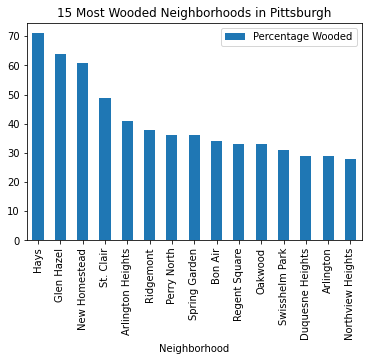

In [30]:
#Plot the top 10 neighborhoods on a bar graph
sub = n.sort_values(by=["Percentage Wooded"], ascending=False).head(15)
sub.plot.bar(x="Neighborhood", y="Percentage Wooded", title="15 Most Wooded Neighborhoods in Pittsburgh")

# Conclusion:

According to this metric, Hays is the best neighborhood to outrun an alien abduction because it is 71% densely wooded land, where you can hide from the aliens. Glen Hazel and New Homestead come in second and third. However, the winner we chose was South Oakland (which is actually only 6% wooded land). We chose South Oakland because of the abundance of bikes for escape and the absence of open fields, but while it lacks forests it is conveniently placed a short, downhill bike ride away from Hays, and (even more conveniently) borders Squirrel Hill South, which ranks in 16th place with 28% percentage wooded land. Thus, many Pittsburgh students are lucky to live in the best neighborhood to avoid alien abductions. 

![running in woods](https://media.giphy.com/media/9r8w0HYcNBeSzuAPOX/giphy.gif)

### Good luck, Pittsburgh!